In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import analyze
import raybay

In [13]:
# Load treatment plan results
result = np.load('result', allow_pickle=True)

In [3]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('result', 'wb'))

In [129]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Bronchus,MaxDvh,AtMost,1560,18.52
1,Bronchus,MaxDose,AtMost,3480,NaN
2,Chestwall_L,MaxDvh,AtMost,3000,2.04
3,D2cm,MaxDose,AtMost,2400,NaN
4,Esophagus,MaxDvh,AtMost,1880,16.91
5,Esophagus,MaxDose,AtMost,3000,NaN
6,GreatVes,MaxDvh,AtMost,4300,5.66
7,GreatVes,MaxDose,AtMost,4900,NaN
8,Heart,MaxDvh,AtMost,2800,1.84
9,Heart,MaxDose,AtMost,3400,NaN


In [5]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Bronchus,MaxDvh,"[0,1560]",18.52,NaN,1
1,Bronchus,MaxDose,"[0,3480]",0.00,NaN,1
2,Chestwall_L,MaxDvh,"[0,3000]",2.04,NaN,1
3,D2cm,MaxDose,"[0,2400]",0.00,NaN,1
4,Esophagus,MaxDvh,"[0,1880]",16.91,NaN,1
5,Esophagus,MaxDose,"[0,3000]",0.00,NaN,1
6,GreatVes,MaxDvh,"[0,4300]",5.66,NaN,1
7,GreatVes,MaxDose,"[0,4900]",0.00,NaN,1
8,Heart,MaxDvh,"[0,2800]",1.84,NaN,1
9,Heart,MaxDose,"[0,3400]",0.00,NaN,1


Text(0, 0.5, 'Objective Value')

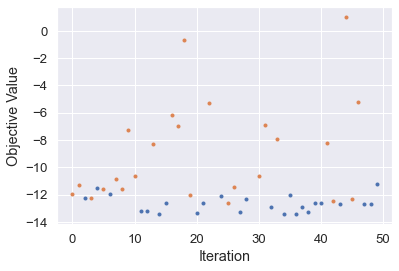

In [64]:
idx0 = (np.array(result.flag_list)==0).nonzero()[0]
idx1 = (np.array(result.flag_list)==1).nonzero()[0]
idx2 = (np.array(result.flag_list)==2).nonzero()[0]
plt.plot(idx0, result.opt_result.func_vals[idx0], '.')
plt.plot(idx1, result.opt_result.func_vals[idx1], '.')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')

/Users/Kelsey/anaconda3/envs/autoray/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Kelsey/anaconda3/envs/autoray/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


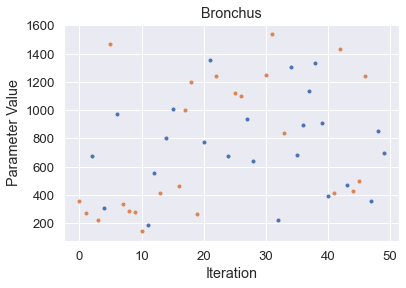

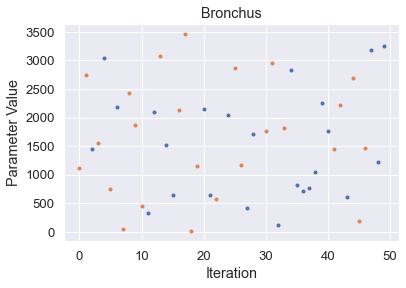

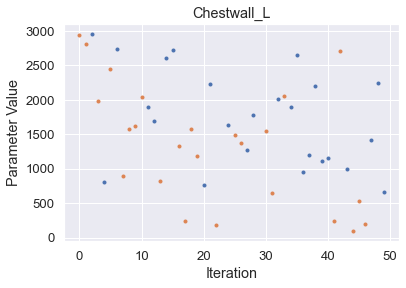

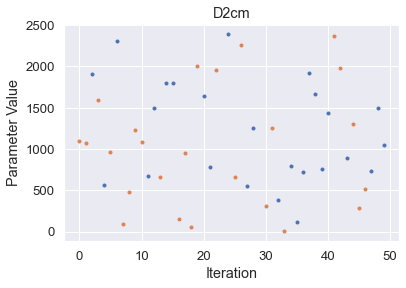

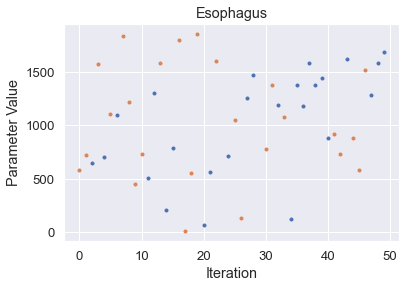

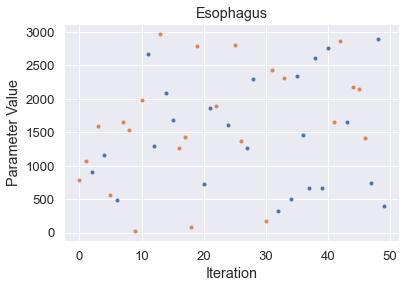

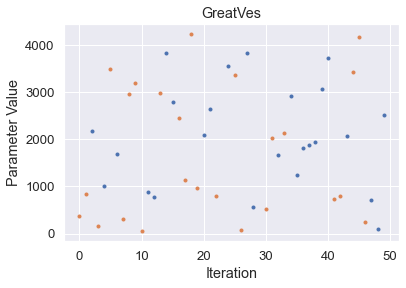

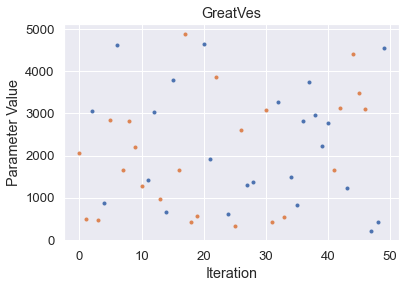

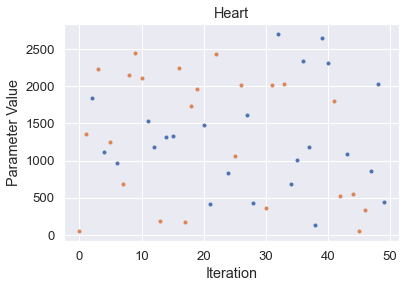

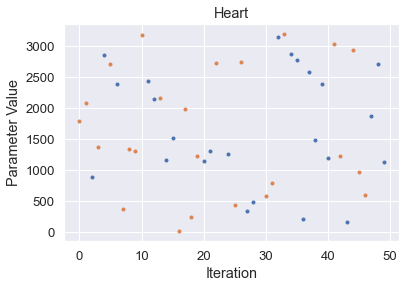

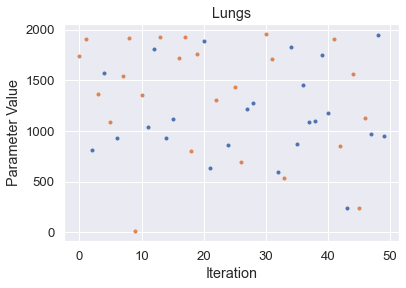

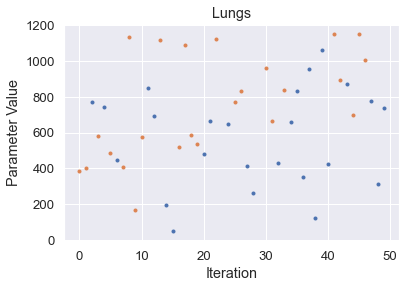

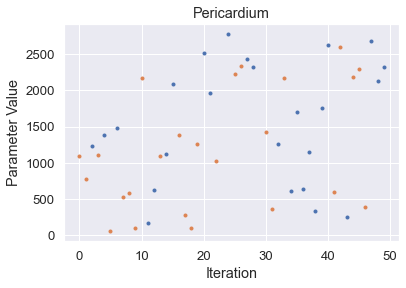

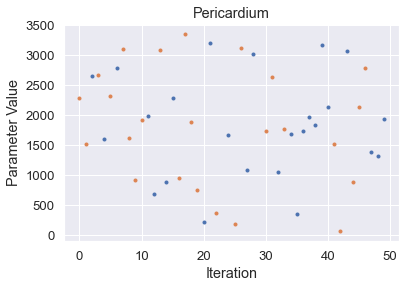

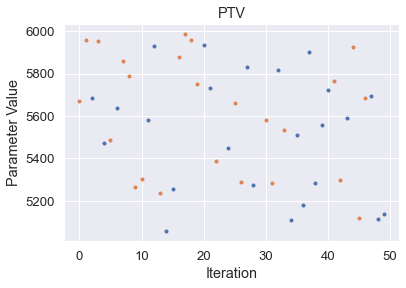

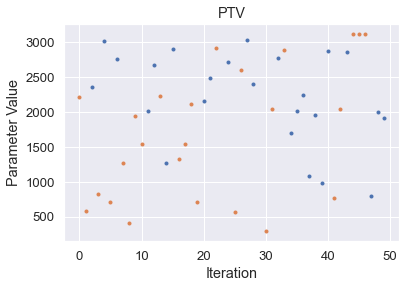

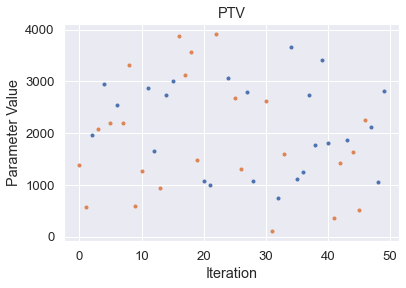

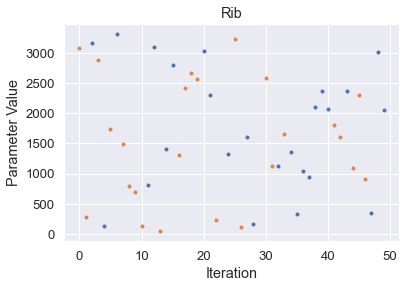

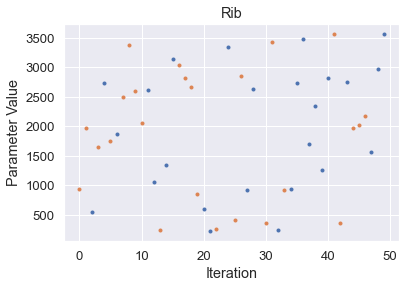

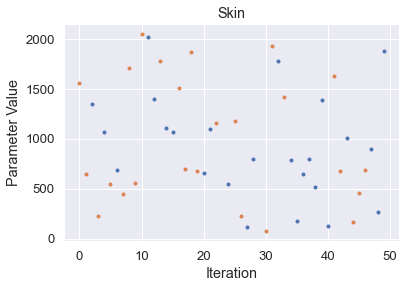

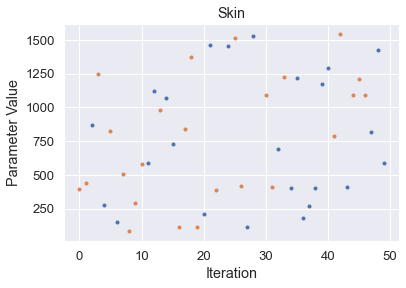

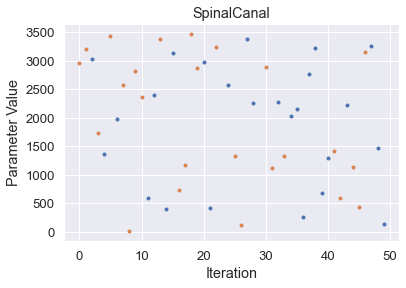

In [121]:
x_iters = [[row[ii] for row in result.opt_result.x_iters] for ii in range(len(result.opt_result.x_iters[0]))]
count = 0
for row in x_iters:
    plt.figure()
    plt.plot(idx0, np.array(row)[idx0], '.')
    plt.plot(idx1, np.array(row)[idx1], '.')
    plt.xlabel('Iteration')
    plt.ylabel('Parameter Value')
    plt.title(result.goal_df.iloc[count]['Roi'])
    count += 1

/Users/Kelsey/anaconda3/envs/autoray/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Users/Kelsey/anaconda3/envs/autoray/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


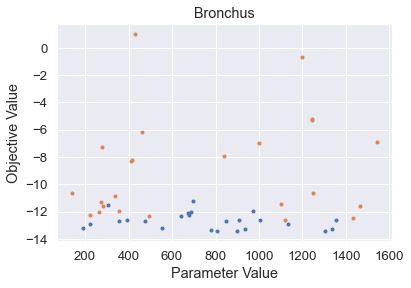

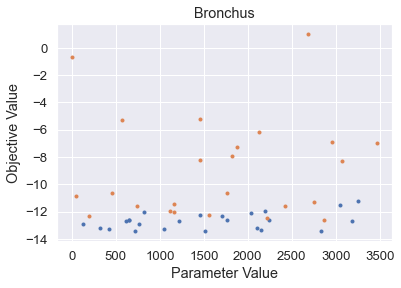

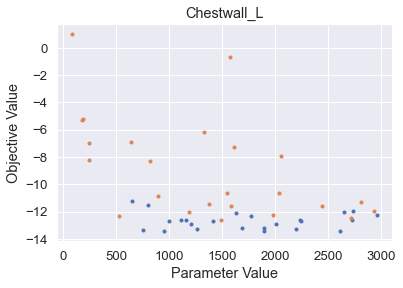

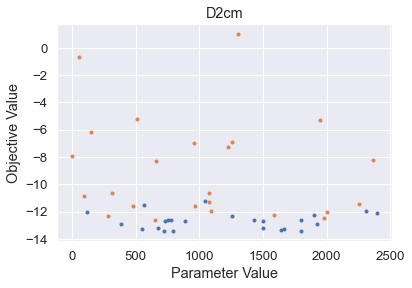

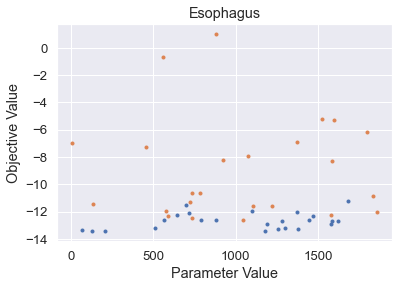

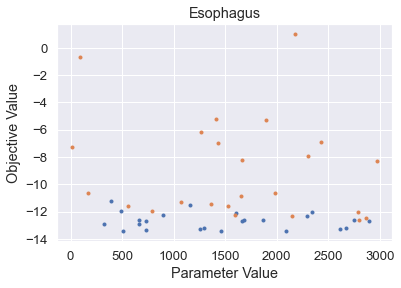

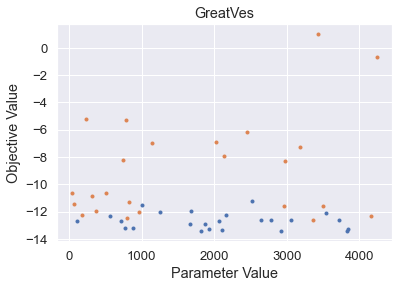

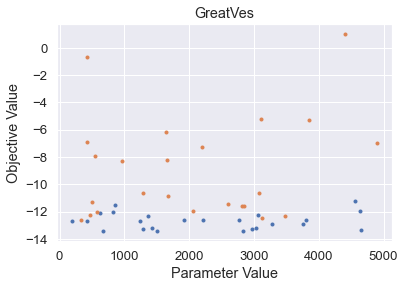

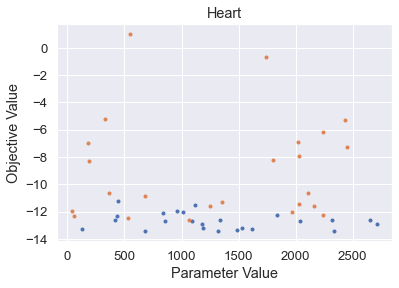

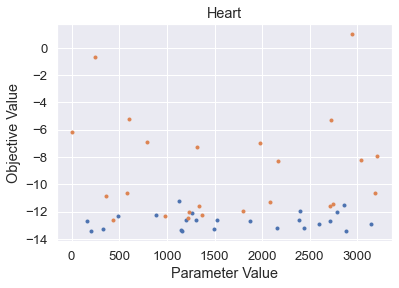

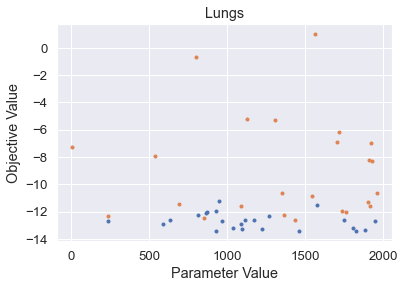

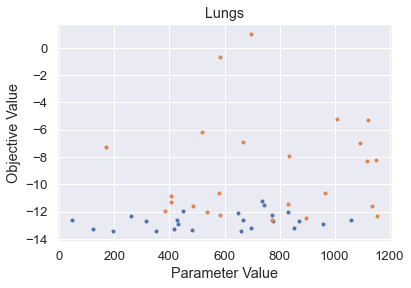

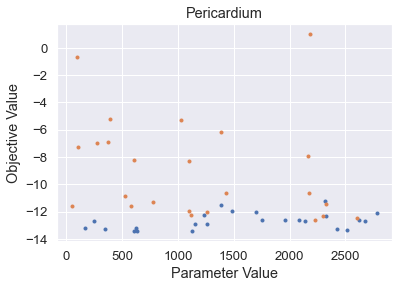

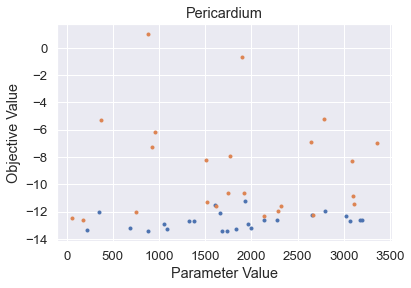

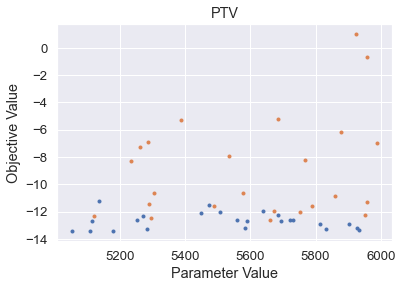

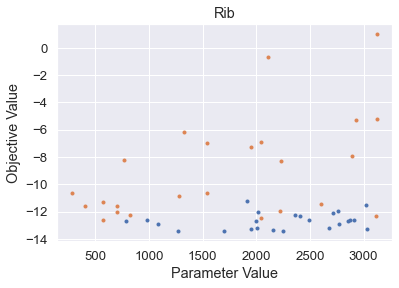

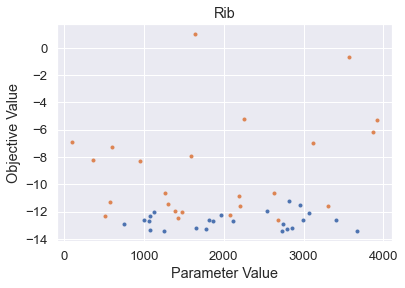

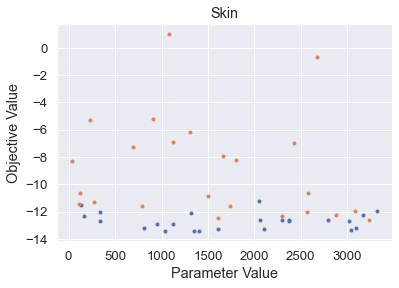

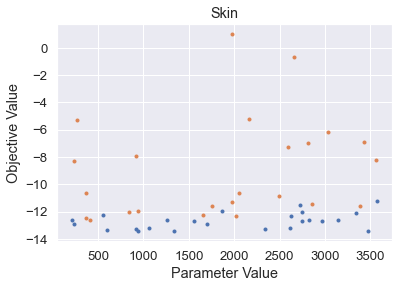

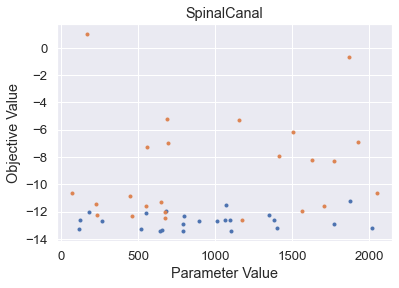

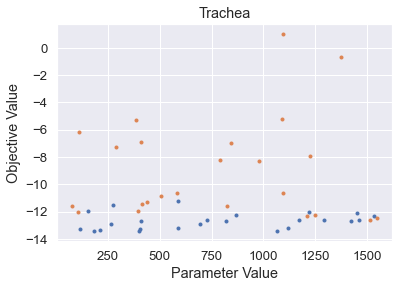

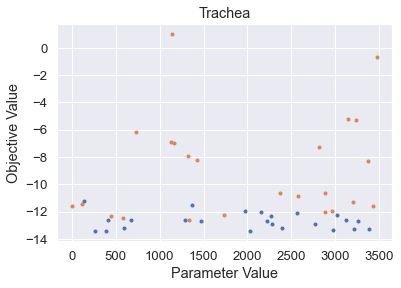

In [74]:
par_df = analyze.get_pars(result.func_df)
count = 0
for row in x_iters:
    plt.figure()v
    plt.plot(np.array(row)[idx0], np.array(result.opt_result.func_vals)[idx0], '.')
    plt.plot(np.array(row)[idx1], np.array(result.opt_result.func_vals)[idx1], '.')
    plt.xlabel('Parameter Value')
    plt.ylabel('Objective Value')
    plt.title(par_df.iloc[count]['Roi'])
    count += 1

In [9]:
#goal_dict = {term: [] for term in par_df['Term']}
goal_dict = {ii: [] for ii in range(len(result.goal_df))}
count = 0
for flag in result.flag_list:
    for goal in goal_dict:
        if flag == 2:
            goal_dict[goal].append(0)
        else:
            goal_dict[goal].append(result.goal_dict[goal][count])
    if flag != 2:
        count += 1

/Users/Kelsey/anaconda3/envs/autoray/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Kelsey/anaconda3/envs/autoray/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


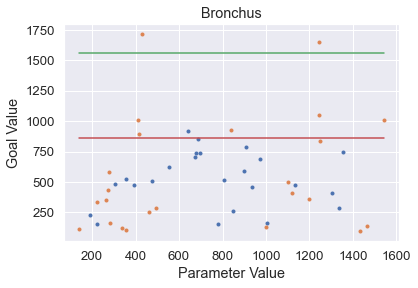

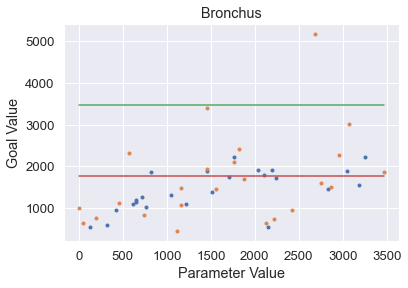

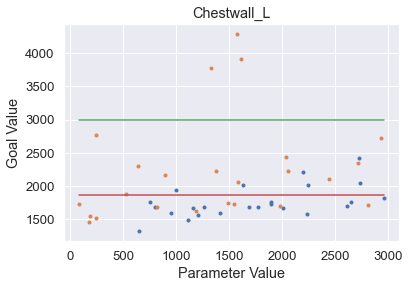

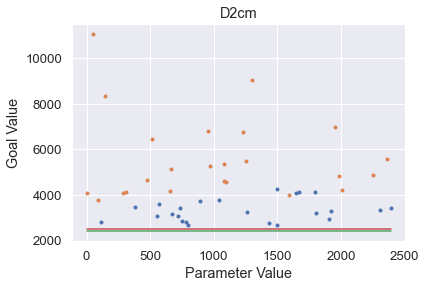

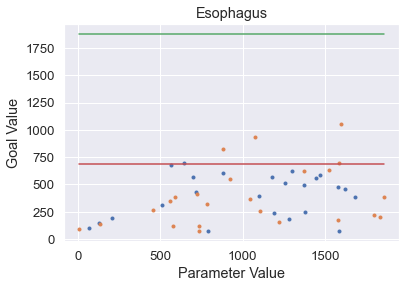

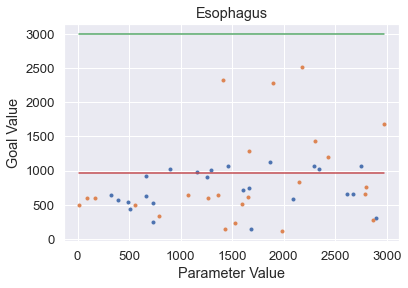

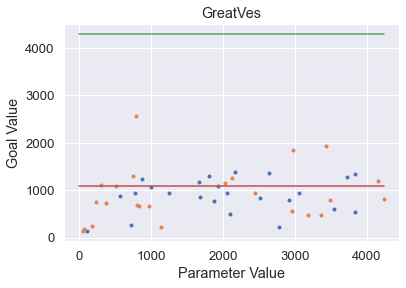

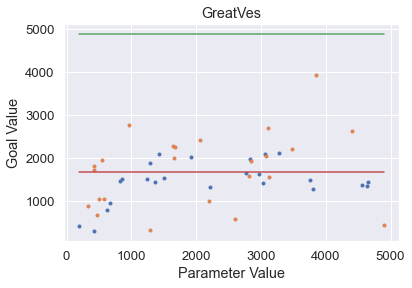

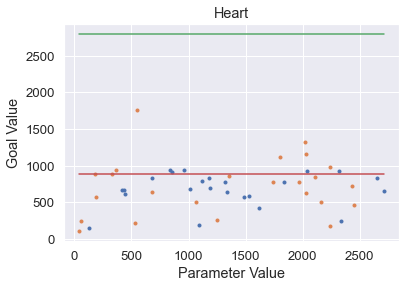

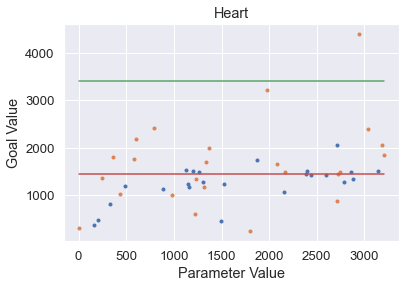

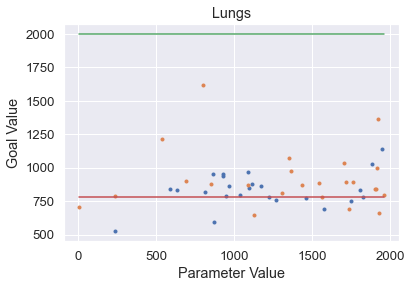

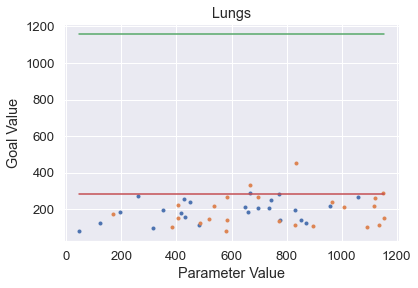

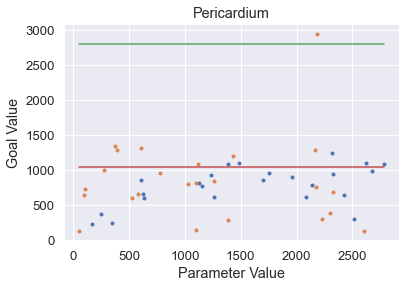

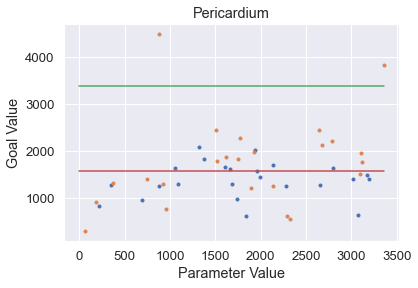

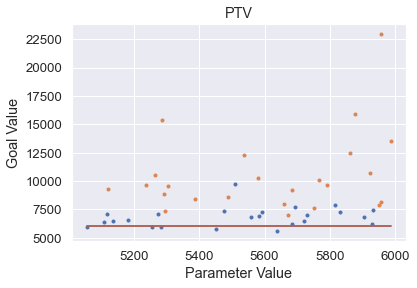

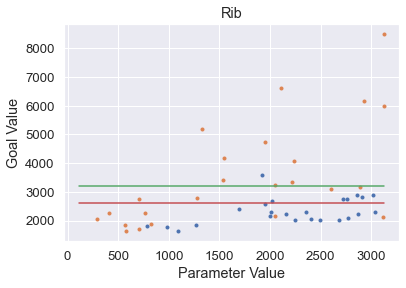

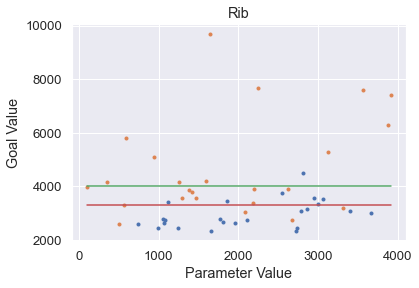

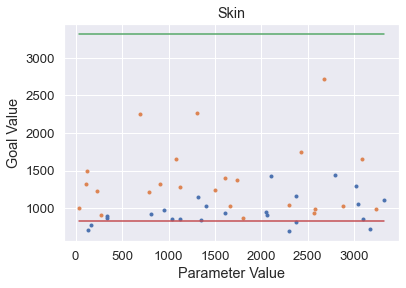

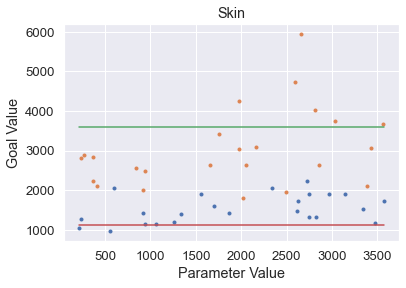

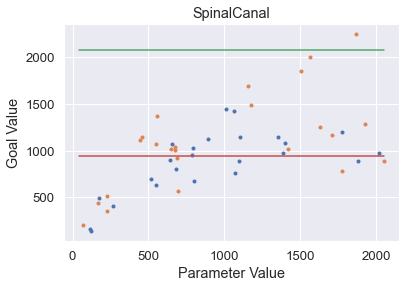

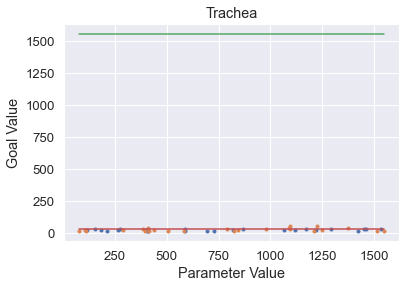

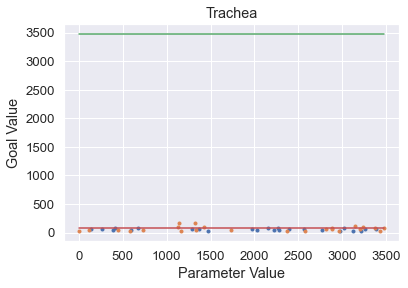

In [123]:
approved = np.load('../approved/result', allow_pickle=True)
for idx, row in par_df.iterrows():
    plt.figure()
    temp = np.array(x_iters)[idx]
    level = result.goal_df.iloc[row['Term']]['AcceptanceLevel']
    app = approved.goal_dict[row['Term']][0]
    plt.plot(temp[idx0], np.array(goal_dict[row['Term']])[idx0], '.')
    plt.plot(temp[idx1], np.array(goal_dict[row['Term']])[idx1], '.')
    plt.plot([np.min(temp), np.max(temp)], [level, level])
    plt.plot([np.min(temp), np.max(temp)], [app, app])
    plt.xlabel('Parameter Value')
    plt.ylabel('Goal Value')
    plt.title(row['Roi'])

In [124]:
# Difficult: 
# - D2cm MaxDose
# - PTV MaxDose
# - Rib?

# Pattern: SpinalCanal

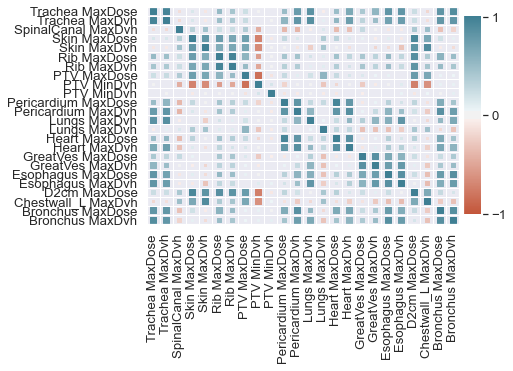

In [7]:
result.corrplot(size=45)

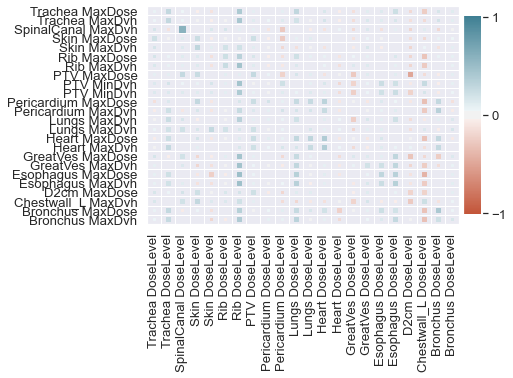

In [10]:
result.goal_dict = goal_dict
result.corrplot('pars', size=45)

In [145]:
# This doesn't look like it helped anything in terms of understanding... 
# too many parameters, and too wide a range to find any useful patterns (except SpinalCord?)

# Focus on which goals from the default that I want to improve upon
# Figure out which objectives to include and what range (do I only tune some, or only include some?)
# Do some sampling with and without those parameters?
# Look back on when I chose the goals < 50% change... what patterns did I see there? (ignore func val, just goals)
# How do I change my objective? Cluster different groups in terms of goals? 
# Figure out which parameters influence which goals? Combination of parameters?

In [18]:
# create column names
# create dataframe with goal values
# follow tutorial!

Roi,Bronchus,Bronchus,Chestwall_L,D2cm,Esophagus,Esophagus,GreatVes,GreatVes,Heart,Heart,...,PTV,PTV,PTV,Rib,Rib,Skin,Skin,SpinalCanal,Trachea,Trachea


In [88]:
xdata, xlabels = analyze.format_data(result.goal_df, result.goal_dict, 'goals')

In [107]:
xdata2 = []
for ii in range(len(xdata)):
    sign = 1 if 'Max' in result.goal_df.iloc[ii]['Type'] else -1
    level = result.goal_df.iloc[ii]['AcceptanceLevel']
    xdata2.append([sign*(val - level)/level for val in xdata[ii]])

In [96]:
xlabels2 = [str(ii) + ' ' + xlabels[ii] for ii in range(len(xlabels))]

In [109]:
goals = pd.DataFrame(columns=xlabels2, data={xlabels2[ii]: xdata2[ii] for ii in range(len(xlabels2))})
goals

,0 Bronchus MaxDvh,1 Bronchus MaxDose,2 Chestwall_L MaxDvh,3 D2cm MaxDose,4 Esophagus MaxDvh,5 Esophagus MaxDose,6 GreatVes MaxDvh,7 GreatVes MaxDose,8 Heart MaxDvh,9 Heart MaxDose,...,14 PTV MinDvh,15 PTV MinDvh,16 PTV MaxDose,17 Rib MaxDvh,18 Rib MaxDose,19 Skin MaxDvh,20 Skin MaxDose,21 SpinalCanal MaxDvh,22 Trachea MaxDvh,23 Trachea MaxDose
0,-0.931162,-0.873354,-0.094907,0.910436,-0.934549,-0.889569,-0.830776,-0.507377,-0.963038,-0.930397,...,-0.000000e+00,0.045615,0.167841,0.041473,-0.034994,-0.500305,-0.308265,-0.039255,-0.991477,-0.993657
1,-0.721976,-0.542015,-0.428458,0.929139,-0.779648,-0.785529,-0.842863,-0.784997,-0.693503,-0.513591,...,-0.000000e+00,0.032092,0.360311,-0.492047,-0.173793,-0.727826,-0.156010,-0.510407,-0.982048,-0.981517
2,-0.528121,-0.459762,-0.394940,0.228946,-0.629881,-0.660232,-0.680015,-0.570539,-0.723078,-0.669007,...,-8.229460e-09,-0.043927,0.034268,-0.276113,-0.343091,-0.783979,-0.732902,-0.446769,-0.978748,-0.978189
3,-0.784122,-0.581610,-0.433389,0.665354,-0.905695,-0.827110,-0.944992,-0.861862,-0.650733,-0.411711,...,-0.000000e+00,-0.023870,0.311894,-0.416301,-0.241316,-0.691227,-0.270283,-0.830995,-0.984850,-0.985305
4,-0.690466,-0.455890,-0.439296,0.495894,-0.698214,-0.674837,-0.750731,-0.692243,-0.717558,-0.564365,...,2.679793e-08,-0.031881,0.232640,-0.100501,-0.105844,-0.784643,-0.378017,-0.634789,-0.980560,-0.980386
5,-0.911974,-0.759955,-0.298210,1.194623,-0.860935,-0.834203,-0.816778,-0.603870,-0.908576,-0.739765,...,-0.000000e+00,0.039788,0.427214,-0.140037,-0.021966,-0.585122,-0.052113,-0.485333,-0.990678,-0.992884
6,-0.560714,-0.449719,-0.319410,0.385272,-0.787799,-0.821681,-0.799740,-0.724739,-0.664265,-0.556252,...,-6.324657e-08,-0.085313,-0.073266,-0.142669,-0.066418,-0.666282,-0.601945,-0.615103,-0.978544,-0.979715
7,-0.920392,-0.812916,-0.280304,0.567667,-0.892913,-0.792816,-0.741980,-0.541373,-0.771566,-0.470495,...,-0.000000e+00,0.150353,1.081997,-0.124135,-0.160116,-0.627577,-0.454346,-0.464041,-0.987322,-0.990411
8,-0.897161,-0.727625,-0.313969,0.932339,-0.917209,-0.922483,-0.870363,-0.677774,-0.818205,-0.498533,...,-0.000000e+00,0.055593,0.611380,-0.296912,-0.203244,-0.633521,-0.412437,-0.439882,-0.990284,-0.992641
9,-0.626417,-0.513149,0.303678,1.817038,-0.859272,-0.832487,-0.887950,-0.797141,-0.832767,-0.657980,...,-0.000000e+00,0.078342,0.761427,0.479292,0.450093,-0.321221,0.316338,-0.342661,-0.983232,-0.981761


In [28]:
# https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb

def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

In [34]:
import pandas as pd
import numpy as np

# Generate 50 variables with 1000 samples
n_variables = 50
n_samples = 1000

# Those variables will be spread over 3 clusters of variable sizes
cluster_size = [5,22,28]
n_clusters = len(cluster_size)

# Assign each variable to a cluster
belongs_to_cluster = [i for i, c in enumerate(cluster_size) for n in range(c)]
np.random.shuffle(belongs_to_cluster)

# This latent data is used to make variables that belong
# to the same cluster correlated.
latent = np.random.randn(n_clusters, n_samples)

variables = []
for i in range(n_variables):
    variables.append(np.random.randn(n_samples) + latent[belongs_to_cluster[i], :])

df = pd.DataFrame(np.array(variables).transpose())

In [35]:
import pandas as pd
import numpy as np

# Generate 50 variables with 1000 samples
n_variables = 50
n_samples = 1000

# Those variables will be spread over 3 clusters of variable sizes
cluster_size = [5,22,28]
n_clusters = len(cluster_size)

# Assign each variable to a cluster
belongs_to_cluster = [i for i, c in enumerate(cluster_size) for n in range(c)]
np.random.shuffle(belongs_to_cluster)

# This latent data is used to make variables that belong
# to the same cluster correlated.
latent = np.random.randn(n_clusters, n_samples)

variables = []
for i in range(n_variables):
    variables.append(np.random.randn(n_samples) + latent[belongs_to_cluster[i], :])

df = pd.DataFrame(np.array(variables).transpose())

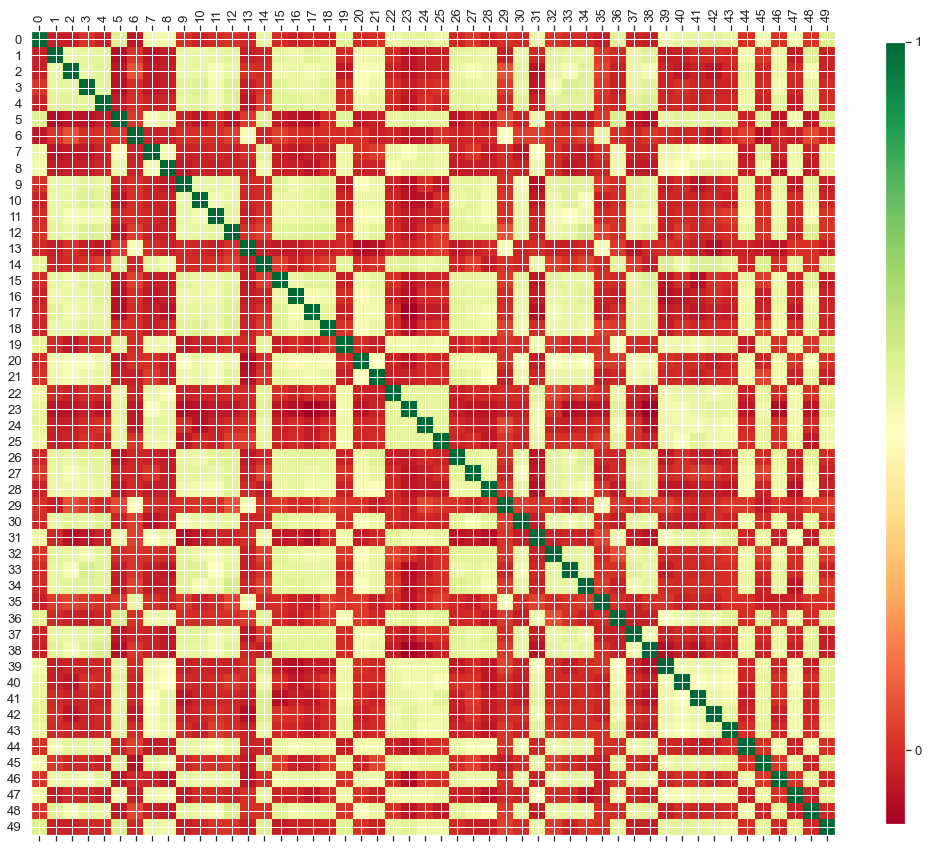

In [36]:
plot_corr(df, size=18)

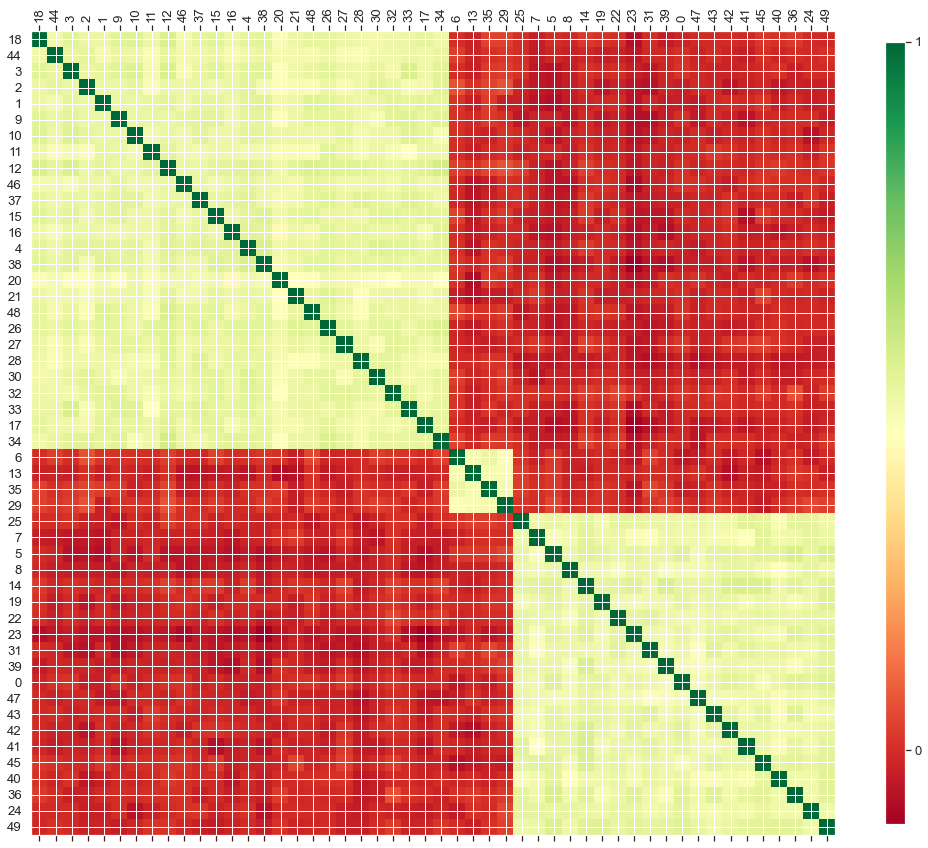

In [49]:
import scipy
import scipy.cluster.hierarchy as sch

X = df.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df = df.reindex(columns, axis=1)

plot_corr(df, size=18)

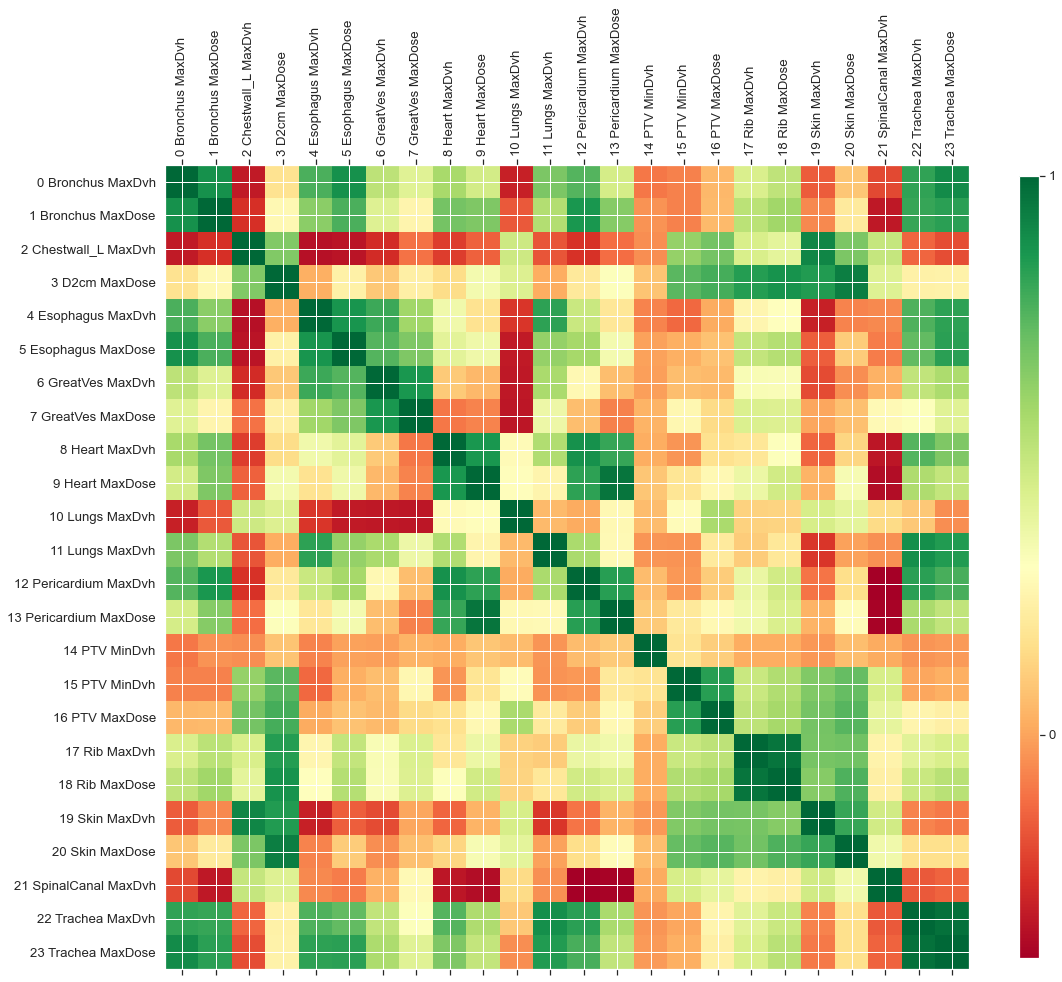

In [110]:
plot_corr(goals, size=18)

In [114]:
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)

In [121]:
idx = list(np.argsort(ind))

In [127]:
xdata = np.array(xdata2)[idx]
ydata = xdata
xlabels = [xlabels[ii] for ii in idx]
ylabels = xlabels

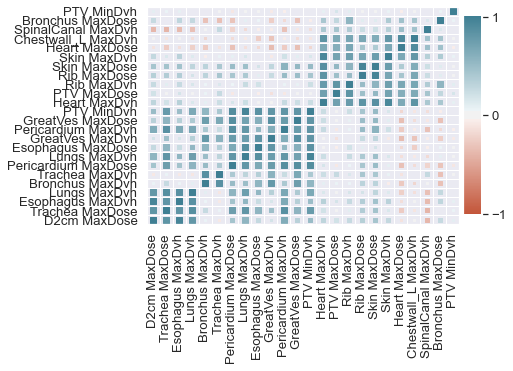

In [128]:
# Plot boxes
title=None
palette = sns.diverging_palette(20, 220, n=256)
plot_grid = plt.GridSpec(1, 15)
ax = plt.subplot(plot_grid[:, :-1])
for ii in range(len(xdata)):
    for jj in range(len(ydata)):
        corr = np.corrcoef(xdata[ii], ydata[jj])[0, 1]
        ax.scatter(ii, jj, marker='s', s=size*abs(corr),
                   c=[palette[int(255/2*(corr + 1))]])

# Initialize tick labels
ax.set_xticks(range(len(xdata)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_yticks(range(len(ydata)))
ax.set_yticklabels(ylabels)
ax.set_title(title)

# Adjust grid lines relative to boxes
ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
ax.set_xlim([-0.5, len(xlabels) - 0.5])
ax.set_ylim([-0.5, len(ylabels) - 0.5])

# Legend
ax = plt.subplot(plot_grid[:, -1])
bar_y = np.linspace(-1, 1, len(palette))
bar_h = bar_y[1] - bar_y[0]
ax.barh(y=bar_y, width=[1]*len(palette), height=bar_h, color=palette,
        linewidth=0)
ax.set_facecolor('w')
ax.set_xticks([])
ax.set_yticks([-1, 0, 1])
ax.yaxis.tick_right()

In [134]:
U, S, Vh= np.linalg.svd(corr)

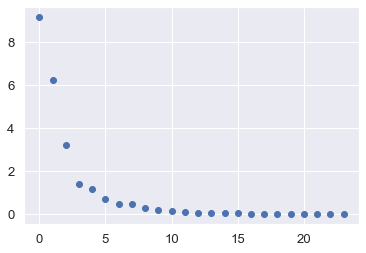

In [136]:
plt.plot(S, 'o')

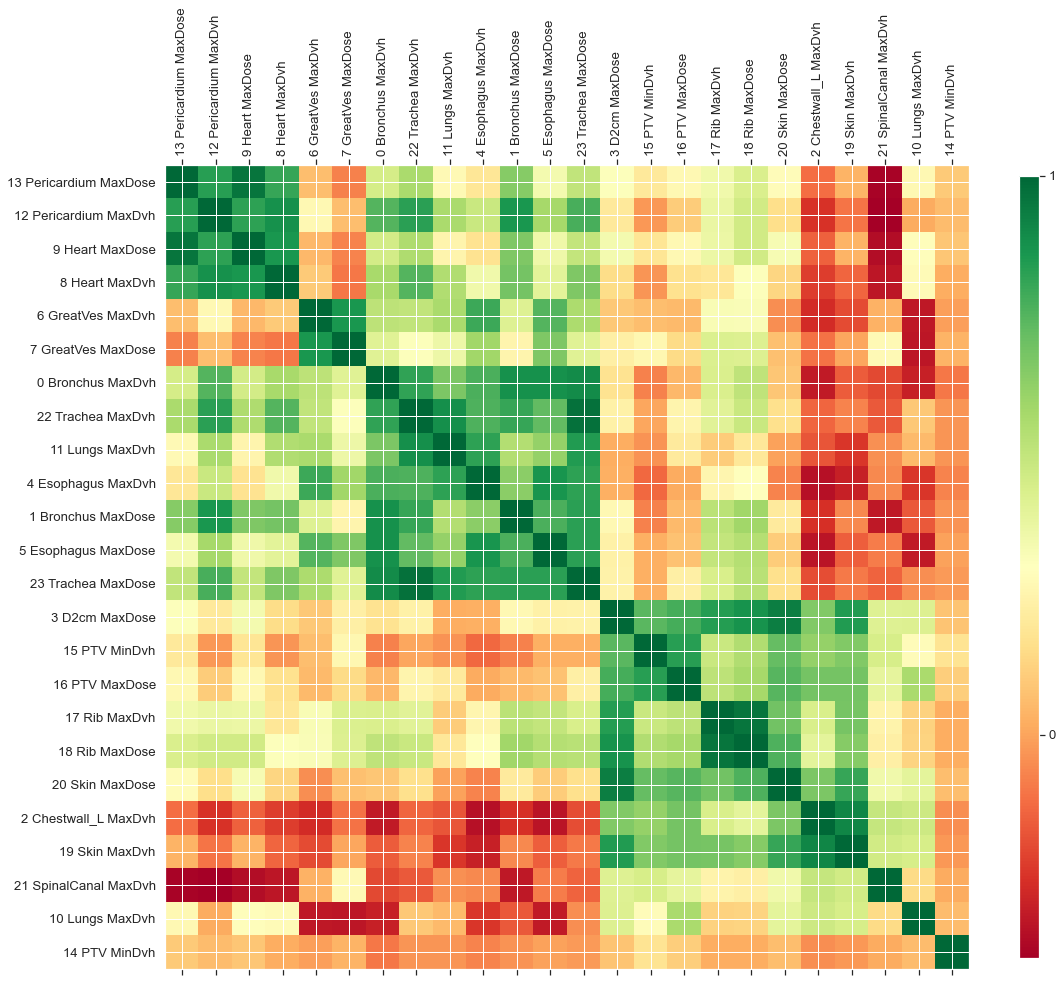

In [111]:
X = goals.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [goals.columns.tolist()[i] for i in list((np.argsort(ind)))]
goals2 = goals.reindex(columns=columns)

plot_corr(goals2, size=18)

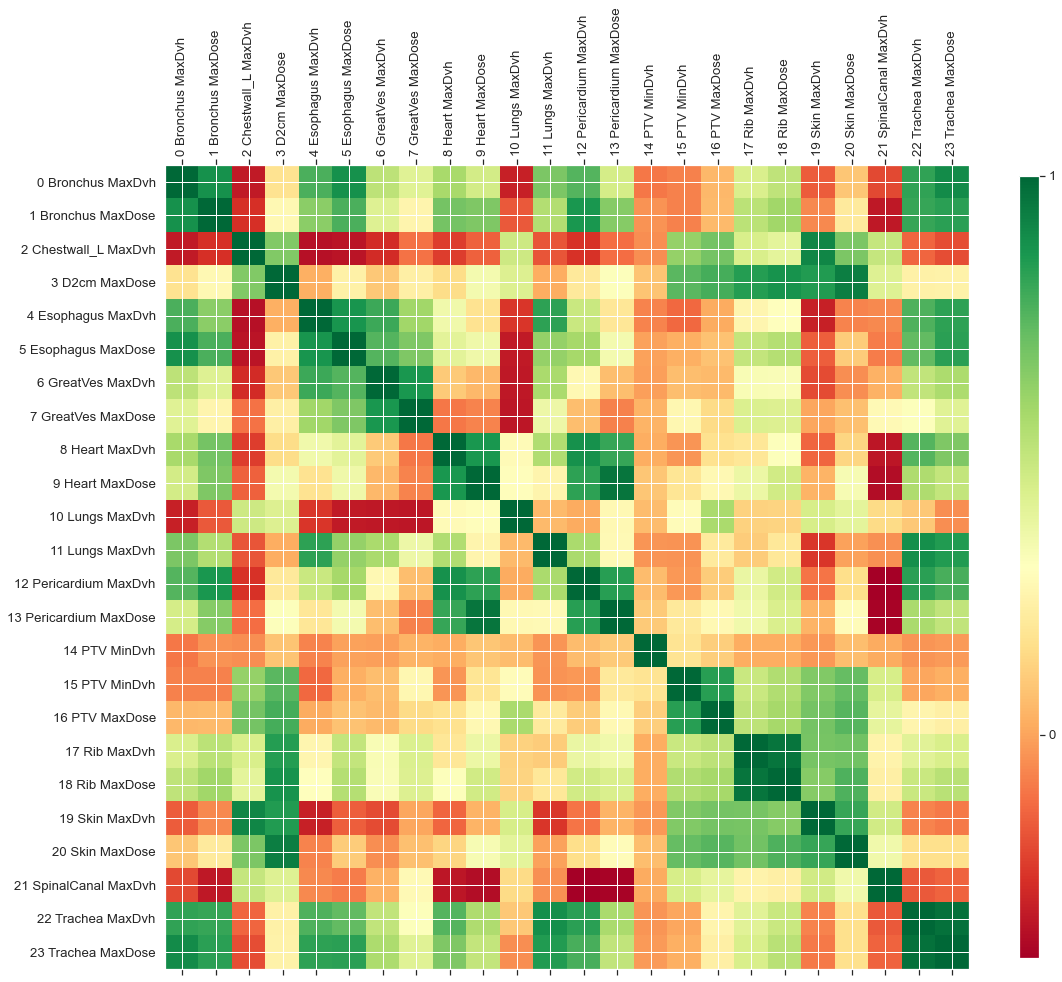

In [112]:
plot_corr(goals, size=18)

In [138]:
default = np.load('../default/result', allow_pickle=True)

In [140]:
percent = []
for index, row in default.goal_df.iterrows():
    level = row['AcceptanceLevel']
    value = default.goal_dict[index][0]
    sign = 1 if 'Max' in row['Type'] else -1
    percent.append(sign*(value - level)/level)

In [143]:
for index, row in default.goal_df.iterrows():
    print(f"Roi: {row['Roi']}, PercentChange: {100*percent[index]:.2f}")

Roi: Bronchus, PercentChange: -38.97
Roi: Bronchus, PercentChange: -35.17
Roi: Chestwall_L, PercentChange: -32.47
Roi: D2cm, PercentChange: 28.43
Roi: Esophagus, PercentChange: -62.48
Roi: Esophagus, PercentChange: -60.64
Roi: GreatVes, PercentChange: -72.61
Roi: GreatVes, PercentChange: -65.80
Roi: Heart, PercentChange: -67.95
Roi: Heart, PercentChange: -55.44
Roi: Lungs, PercentChange: -57.34
Roi: Lungs, PercentChange: -74.81
Roi: Pericardium, PercentChange: -62.71
Roi: Pericardium, PercentChange: -55.53
Roi: PTV, PercentChange: -0.00
Roi: PTV, PercentChange: -7.14
Roi: PTV, PercentChange: -7.42
Roi: Rib, PercentChange: -9.99
Roi: Rib, PercentChange: -1.47
Roi: Skin, PercentChange: -70.90
Roi: Skin, PercentChange: -64.83
Roi: SpinalCanal, PercentChange: -56.17
Roi: Trachea, PercentChange: -97.72
Roi: Trachea, PercentChange: -97.69


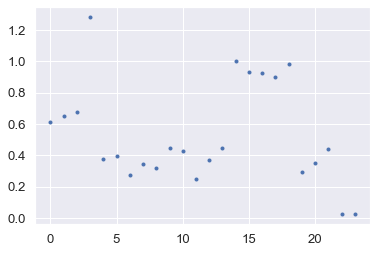

In [155]:
percent = np.array(percent)
idx = np.argsort(percent)
plt.plot(percent + 1, '.')

In [158]:
for index, row in default.goal_df.iterrows():
    print(f"Roi: {row['Roi']}, Weight: {percent[index] + 1:.2f}")

Roi: Bronchus, Weight: 0.61
Roi: Bronchus, Weight: 0.65
Roi: Chestwall_L, Weight: 0.68
Roi: D2cm, Weight: 1.28
Roi: Esophagus, Weight: 0.38
Roi: Esophagus, Weight: 0.39
Roi: GreatVes, Weight: 0.27
Roi: GreatVes, Weight: 0.34
Roi: Heart, Weight: 0.32
Roi: Heart, Weight: 0.45
Roi: Lungs, Weight: 0.43
Roi: Lungs, Weight: 0.25
Roi: Pericardium, Weight: 0.37
Roi: Pericardium, Weight: 0.44
Roi: PTV, Weight: 1.00
Roi: PTV, Weight: 0.93
Roi: PTV, Weight: 0.93
Roi: Rib, Weight: 0.90
Roi: Rib, Weight: 0.99
Roi: Skin, Weight: 0.29
Roi: Skin, Weight: 0.35
Roi: SpinalCanal, Weight: 0.44
Roi: Trachea, Weight: 0.02
Roi: Trachea, Weight: 0.02
